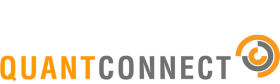
##Introduction to Financial Python [Tutorial 6]

##Métodos Numéricos
###Gustavo Alberto Puentes Romero

#Rate of Return, Mean and Variance

##Introducción
En este capítulo vamos a introducir algunos conceptos básicos en finanzas cuantitativas. Comenzamos con la tasa de rendimiento, la media y la varianza. Puede pensar que es sencillo calcular estos valores, sin embargo, existen varios métodos diferentes para calcularlos. Es importante elegir los métodos de cálculo adecuados para cada caso.

##Tasa de retorno

### Retorno de un solo período

La tasa de rendimiento de un solo período se puede calcular de la siguiente manera:

$$ r = \frac{P{_t}}{P{_0}} - 1 = \frac{P{_t}-P{_0}}{P{_0}} $$

Dónde $r$ es la tasa de rendimiento, $P{_t}$ es el precio del activo en el momento $t$, y $P{_0}$ es el precio del activo en el momento 0.

In [1]:
import numpy as np
rate_return = 102.0/100 - 1
print (rate_return)

0.020000000000000018


Digamos que compramos una acción a 100 y medio año después crecerá a 102. Un año después, el precio llegará a 104 dólares. ¿Cómo calcular nuestra rentabilidad total? Bueno, podemos considerarlo como un período único:

$$r = 104/100 - 1 = 0,04$$

o como un período de dos etapas:

$$r = (1 + r_1) * (1 + r_2) - 1 = \frac{102}{100} * \frac{104}{102} - 1 = 0.04$$

Aquí hacemos cálculos dos veces al año. Se llama capitalización semestral. ¿Qué tal la capitalización trimestral? Supongamos que los precios de las acciones al final de cada trimestre son $p_1, p_2, p_3, p_4 $ respectivamente.

$$ r = (1 + r_1) * (1 + r_2) * (1+r_3) * (1+r_4) - 1$$

La tasa de rendimiento que calculamos aquí se llama **rendimiento acumulado** o **rendimiento total** . Mide el rendimiento total de este activo durante un período de tiempo.

Ahora considere la siguiente situación: tenemos dos estrategias: la estrategia A y la estrategia B. Probamos la estrategia A durante 1 año y el rendimiento acumulado es del 20%, mientras que probamos la estrategia B durante 3 meses (un trimestre) y el rendimiento acumulado es 6%. ¿Qué estrategia tiene una alta tasa de rendimiento? Nuestro método comúnmente utilizado es convertir todos los rendimientos en rendimiento anual compuesto , independientemente del horizonte de inversión de cada estrategia. Ahora podemos comparar los rendimientos de las estrategias con diferentes horizontes temporales. Dado que hay cuatro trimestres en un año, el rendimiento anual de la estrategia B es:

$$(1 + 0.06)^{4} = 1 + r $$

$$r = 0.262$$

La estrategia B tiene un rendimiento anual compuesto más alto cuando comparamos el 26% con el 20%.


###Retorno de logaritmo


En el ejemplo anterior, la estrategia A tiene un rendimiento del 6% durante tres meses. Nominalmente, el rendimiento anual sería 4 * 6% = 24%. Esta tasa de interés anual nominal se denomina tasa de interés anual establecida. Se calcula como la tasa de interés periódica multiplicada por el número de períodos por año. Funciona de acuerdo con el interés simple y no toma en cuenta los períodos de capitalización, mientras que la tasa de interés anual efectiva es del 26% como calculamos anteriormente y sí considera la capitalización intra-anual. La tasa de interés anual efectiva es una herramienta fundamental que permite evaluar el retorno real de la inversión. Si asumimos que el número de períodos de capitalización en un año es n, la fórmula para convertir la tasa de interés anual establecida en la tasa de interés anual efectiva es:

$$r_{effective} = (1 + \frac{r_{nominal}}{n})^n - 1$$

Ahora imagine que el precio del activo cambia cada segundo o incluso cada milisegundo, el período de capitalización n se acerca al infinito. A esto se le llama **capitalización continua**. La fórmula de cálculo se da a continuación:

$$\lim_{n \rightarrow \alpha} (1 + \frac{r}{n})^n = e^r$$

De la ecuación del límite anterior, sabemos que si asumimos una capitalización continua:

$$e^{r_{nominal}} = 1 + r_{effective} = \frac{P_t}{P_0}$$

Entonces tomamos $ln$ en ambos lados de la ecuación:

$$ r_{nominal} = ln\frac{P_t}{P_0} = lnp_t - lnp_0$$

Aquí tenemos el retorno logarítmico,  o retorno compuesto continuamente . Este rendimiento es el rendimiento nominal con el interés compuesto cada milisegundo. Para ver cómo se acerca a la tasa de interés efectiva, recuerde la ecuación anterior:

$$e^{r_{nominal}} = 1 + r_{effective}$$

entonces nosotros tenemos

$$r_{effective} = e^{r_{nominal}} - 1 \approx r_{nominal}$$

donde la segunda igualdad se mantiene debido a la expansión de Taylor y la tasa de interés es pequeña. Esto se usa con frecuencia al calcular los rendimientos, porque una vez que tomamos el logaritmo de los precios de los activos, podemos calcular el rendimiento del logaritmo simplemente haciendo una resta. Aquí usamos los precios de las acciones de Apple como ejemplo:

In [2]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = 'tnCnvFmEqC5qH9fr-2Ey'

In [3]:
import numpy as np
#get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table.loc['2017-3',['Open','Close']]
#take log return
aapl['log_price'] = np.log(aapl.Close)
aapl['log_return'] = aapl['log_price'].diff()
print (aapl)

               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

Aquí calculamos el rendimiento logarítmico diario de las acciones de Apple. Dado que conocemos el rendimiento del logaritmo diario de en este mes, podemos calcular el rendimiento mensual simplemente sumando todos los rendimientos diarios.

In [4]:
month_return = aapl.log_return.sum()
print (month_return)

0.0273081001636184


Puede parecer incorrecto resumir los rendimientos diarios, pero podemos demostrar que es matemáticamente correcto. Supongamos que los precios de las acciones en un período de tiempo están representados por $[p_0, p_1, p_2, p_3 ..... p_n]$. Entonces, la tasa de rendimiento acumulada viene dada por:

$$1 + r_{effective} \approx 1 + r_{nominal} = ln \frac{P_t}{P_0} = ln \frac{P_{t}}{P_{t-1}} + ln\frac{P_{t-1}}{P_{t-2}} + ......+ ln \frac{P_1}{P_0}$$

De acuerdo con la ecuación anterior, podemos sumar simplemente cada retorno logarítmico en un período para obtener el retorno acumulativo. La conveniencia de este método es también una de las razones por las que utilizamos el rendimiento logarítmico en las finanzas cuantitativas.

##Media

### Media aritmética

La media es una medida de tendencia central de una serie de datos. Captura el carácter clave de la distribución de la serie de datos. Cuando hablamos de media, por defecto se refiere a **media aritmética**. Se define como la suma de los valores dividida por el número de observaciones:

$$\mu = \frac{\sum_{i=1}^{n}x_i}{n}$$

Dónde $(x_1, x_2, x_3.....x_n)$ es nuestra serie de datos.

En Python podemos usar NumPy.mean() para hacer el cálculo:

In [5]:
print (np.mean(aapl.log_price))

4.94597446550658


###Media geométrica


La media geométrica es un promedio que es útil para series de datos de números positivos que se interpretan mejor según su producto, como la tasa de crecimiento. Se calcula por:

$$\bar{x} = \sqrt[n]{x_1 x_2 x_3.....x_n}$$

Calculemos la media geométrica de una serie de rendimiento de un solo período:

$$1 + \bar{r} = \sqrt[t] { \frac{P_t}{P_{t-1}}*\frac{P_{t-1}}{P_{t-2}} * ... * \frac{P_{2}}{P_{1}} * \frac{P_{1}}{P_{0}}}$$

$$(1 + \bar{r}) = \sqrt[t]{\frac{P_t}{P_0}}$$

Ahora la ecuación se convierte en la forma con la que estamos familiarizados:

$$(1 + \bar{r})^t = \frac{P_t}{P_0}$$

Por eso dijimos que tiene sentido cuando se aplica a las tasas de crecimiento.

##Varianza y desviación estándar

###Varianza


La **varianza** es una medida de dispersión. En finanzas, la mayoría de las veces, la variación es sinónimo de riesgo. Cuanto mayor sea la variación del precio de un activo, mayor riesgo asume el activo. La varianza suele estar representada por $\sigma^2$, y se calcula por

$$\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}$$

En python podemos usar NumPy.var para calcularlo:

In [6]:
print (np.var(aapl.log_price))

0.00014203280448152512


###Desviación Estándar

La medida de dispersión más utilizada en las finanzas es **la desviación estándar** . Suele estar representado por $\sigma$. Es obvio ver la relación entre la desviación estándar y la varianza:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}}$$

NumPy también nos proporciona un método para calcular la desviación estándar.

In [7]:
print (np.std(aapl.log_price))

0.011917751653794651


#Resumen
En este capítulo presentamos diferentes tipos de tasa de retorno, que podrían ser un poco complicadas cuando los calculamos. La media y la desviación estándar también son conceptos muy importantes cuando realizamos pruebas de hipótesis o medimos el riesgo asociado con un activo.